# **Lab 4: Function approximation**
**Kristoffer Almroth**

# **Abstract**

Fourth lab in the course DD2363 Methods in Scientific Computing. This lab is about function approximations.

# **Set up environment**

Dependencies needed for running the code.

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import sympy as sp
from sympy import *
import random

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

import unittest

# **Introduction**

Function approximations is an important tool. Here we make an $L_2$ projection onto the the function space $V_{h}^{1}$ where $V_{h}^{1}$ is an continuous piecewise polynomial space given by 

$P_hf(x) = \sum_{j=0}^{m+1} \alpha_j \phi_j (x)$

We want to solve the equation $Ax=b$ where 

$a_{ij} = (\phi_j, \phi_i)$

$b_i=(f, \phi_i)$

# **Methods**

### L2 projection to pw linear approximation over mesh in 1D

The A matrix is sparse and can be calculated through the following formulas:

$a_{i \space i} = \frac{h_i}{3}+\frac{h_{i+1}}{3}$

$a_{i \space i+1} = \frac{h_{i+1}}{6}$

$a_{i \space i-1} = \frac{h_i}{6}$

The b vector:

$b_i = f(x_i)(\frac{h_i}{2} + \frac{h_{i+1}}{2})$


In [0]:
def L2projection(f, x):

  n = x.size
  A = np.zeros(shape=(n,n))
  b = np.zeros(n)

  # A matrix
  for i in range(0, n):

    if i > 0:
      h_i = x[i]-x[i-1]
      A[i,i] += h_i/3
      A[i,i-1] = h_i/6

    if i < n-1: 
      h_i1 = x[i+1]-x[i]
      A[i,i] += h_i1/3
      A[i,i+1] = h_i1/6

  # b vector
  for i in range(0, n):
    if i > 0:
      h_i = x[i] - x[i-1]
      b[i] += f(x[i])*h_i/2
    if i < n-1:
      h_i1 = x[i+1] - x[i]
      b[i] += f(x[i])*h_i1/2
  
  # Solve the equation
  return np.linalg.solve(A,b)

# **Results**

The function is tested by inputting a sequence of points with decreasing interval length and checking that the error converges towards 0.

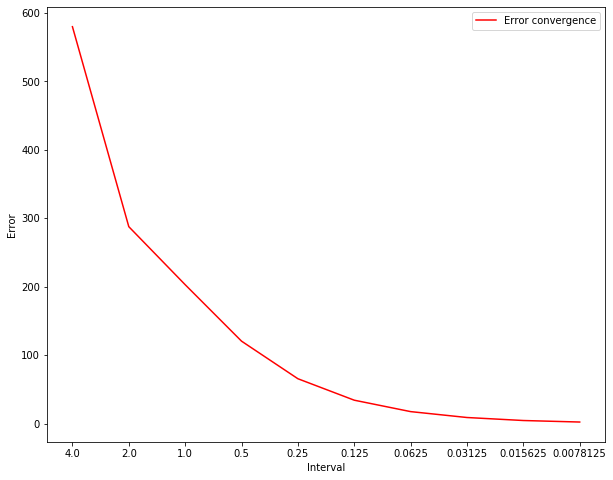

In [50]:
if __name__ == '__main__':
    f1 = lambda x : sin(x) + x**3
    intervals = np.array([4, 2, 1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125])
    dif = np.zeros(intervals.size)

    for i in range(intervals.size):
      x_points = np.arange(0,10,intervals[i])
      c = L2projection(f1, x_points)

      for j in range(x_points.size):
        dif[i] += np.abs(f1(x_points[j])-c[j])

    # Plot the error convergence
    plt.figure(figsize=(10,8))
    plt.plot(dif, "-r", label="Error convergence")
    plt.legend(loc="upper right")
    plt.xlabel("Interval")
    plt.ylabel("Error")
    plt.xticks(np.arange(intervals.size), intervals)
    plt.show()

# **Discussion**

The theory required for this lab was harder than the previous three, but the code in the end is rather simple. 